# Topological optimization of the  ICLR acronym

In this notebook, we show how a topological loss can be use to increase the 'connectedness' of a data set.

We start by setting the working directory and importing the necessary libraries.

In [1]:
# Set working directory
import os
os.chdir("..")

# Handling arrays and data.frames
import numpy as np

# Functions for deep learning (Pytorch)
import torch
from torch import nn

# Pytorch compatible topology layer
from topologylayer.nn import AlphaLayer
from topembed import DiagramFeature

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load and view data

We load and view the data as follows.

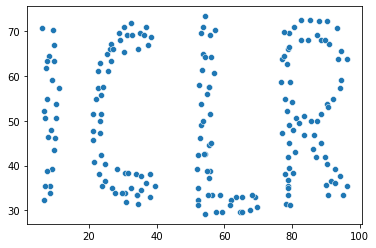

In [6]:
# Load the data
data = np.loadtxt(os.path.join("Data", "ICLR.csv"), delimiter=",")

# Plot the data
fig, ax = plt.subplots()
sns.scatterplot(x=data[:,0], y=data[:,1])
plt.show()

## Apply topological optimization to the embedding

We now show how we can use topological optimization to encourage the model underlying the data to become connected. As a topological loss, we will use the total (finite) 0-dimensional persistence.

In [21]:
# Define topological optimization

def g(p): # function that returns the persistence d of a point (0, d) with d < inf
    return p[1] if p[1] < np.inf else torch.tensor(0).type(torch.float)
top_layer = AlphaLayer(maxdim=1) # alpha complex layer
total_persistence = DiagramFeature(dim=0, g=g) # compute total 0-dimensional persistence

def top_criterion(output):
    
    dgminfo = top_layer(output)            
    loss = total_persistence(dgminfo)
    
    return loss

We can now conduct the topological optimization as follows.

[epoch 1] [topological loss: 457.542542]
[epoch 10] [topological loss: 284.910065]
[epoch 20] [topological loss: 228.960098]
[epoch 30] [topological loss: 201.375015]
[epoch 40] [topological loss: 182.194290]
[epoch 50] [topological loss: 167.809265]
[epoch 60] [topological loss: 155.074249]
[epoch 70] [topological loss: 147.100143]
[epoch 80] [topological loss: 138.543335]
[epoch 90] [topological loss: 131.408142]
[epoch 100] [topological loss: 125.580673]


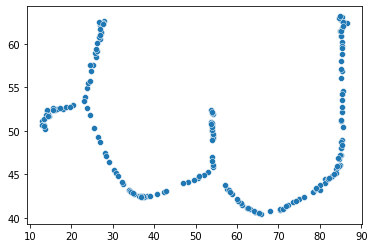

In [34]:
# Learning hyperparameters
num_epochs = 100
learning_rate = 1e0

# Conduct topologically regularized embedding
Y = torch.autograd.Variable(torch.tensor(data).type(torch.float), requires_grad=True)
optimizer = torch.optim.Adam([Y], lr=learning_rate)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    loss = top_criterion(Y)
    loss.backward()
    optimizer.step()

    if epoch == 0 or (epoch + 1) % (int(num_epochs) / 10) == 0:
        print ("[epoch %d] [topological loss: %f]" % (epoch + 1, loss.item()))

Y = Y.detach().numpy()

# View topologically optimized data
fig, ax = plt.subplots()
sns.scatterplot(x=Y[:,0], y=Y[:,1])
plt.show()

Finally, we save the optimized data for plotting in R.

In [36]:
np.savetxt(os.path.join("Data", "ICLR_optimized.csv"), Y, delimiter=",")